In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data_path = '/home/luna/phedata.csv'
data = pd.read_csv(data_path)
data.describe()

,alkanes,primary alcohols,sec. alcohols,primary fatty acids
count,274.000000,274.000000,274.000000,274.000000
mean,60.166043,53.328113,9.416510,98.499793
std,83.156200,42.173650,7.744314,79.055443
min,1.447411,2.791488,0.000000,0.000000
25%,15.329865,25.503873,4.316885,45.088071
50%,25.535382,39.944399,7.243286,76.415907
75%,79.396778,73.511524,12.896460,129.326249
max,838.194025,366.136286,57.979051,567.404181


In [3]:
# normalization
columns_to_normalize = ['alkanes', 'primary alcohols', 'primary fatty acids']

for column in columns_to_normalize:
    data[column + '_norm'] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())
    

In [4]:
#grous = data['group']
data = data[data['group'].isin(['1', '4', '5', '6', '7'])]
data

# normalization
#columns_to_normalize = ['alkanes', 'primary alcohols', 'primary fatty acids']

#for column in columns_to_normalize:
#    data[column + '_norm'] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())

,taxa,alkanes,primary alcohols,sec. alcohols,primary fatty acids,group,alkanes_norm,primary alcohols_norm,primary fatty acids_norm
254,06_1,3.606693,22.314219,0.000000,280.135660,6,0.002581,0.053731,0.493714
255,01-01,9.752495,21.948455,5.554312,258.557317,1,0.009925,0.052724,0.455685
256,04_02,11.820346,23.716009,3.687549,169.102235,4,0.012397,0.057589,0.298028
257,06_03,6.723824,20.949047,14.345585,469.100713,6,0.006306,0.049973,0.826749
258,04_01,12.637716,24.753917,5.462080,235.052106,4,0.013374,0.060445,0.414259
259,04_03,7.723542,30.758405,5.152112,105.032444,4,0.007501,0.076971,0.185110
260,06_02,17.730878,21.802057,11.870478,301.927384,6,0.019460,0.052321,0.532120
261,06_06,288.916679,9.954504,3.773514,21.635676,6,0.343556,0.019714,0.038131
262,06_04,293.376396,23.051307,6.136044,35.049795,6,0.348886,0.055759,0.061772
263,06_05,293.594581,18.720591,13.439445,32.453514,6,0.349147,0.043840,0.057196


In [5]:
groups = data['group'].unique()
print(groups)
groups

['6' '1' '4' '7' '5']


array(['6', '1', '4', '7', '5'], dtype=object)

In [6]:
colors = plt.cm.jet(np.linspace(0, 1, len(groups)))
# group_colors = dict(zip(groups, colors))
group_colors = {'1': 'blue', '5': 'yellow', '4': 'red', '6': 'purple', '7': 'pink'}

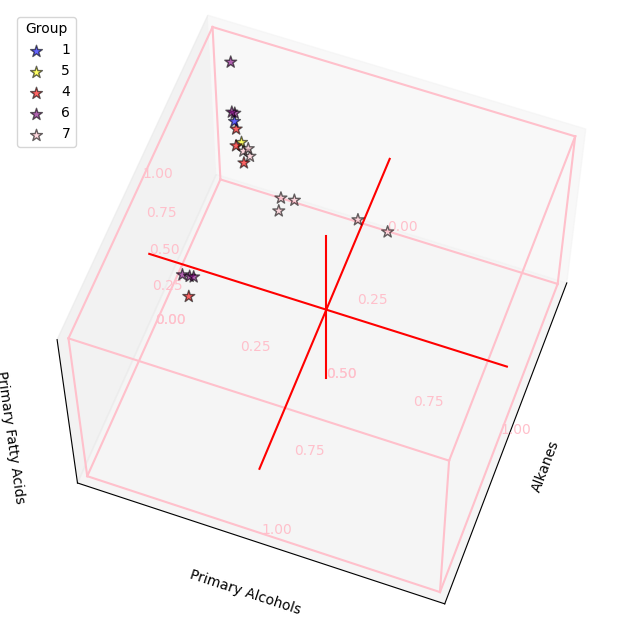

In [7]:
# image size
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# box vertexs
points = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])

# box edges
edges = [(0, 1), (1, 3), (3, 2), (2, 0), (4, 5), (5, 7), (7, 6), (6, 4), (0, 4), (1, 5), (2, 6), (3, 7)]

# draw box
for edge in edges:
    p1, p2 = points[edge[0]], points[edge[1]]
    ax.plot3D(*zip(p1, p2), color="pink")

# draw mid line
ax.plot3D([0.5, 0.5], [0.5, 0.5], [0, 1], color="r")  # Z
ax.plot3D([0.5, 0.5], [0, 1], [0.5, 0.5], color="r")  # Y
ax.plot3D([0, 1], [0.5, 0.5], [0.5, 0.5], color="r")  # X

# add ruler（use text）
for x_tick in np.linspace(0, 1, 5):
    ax.text(x_tick, 0.5, 0, '{:.2f}'.format(x_tick), color="pink")

for y_tick in np.linspace(0, 1, 5):
    ax.text(0.5, y_tick, 0, '{:.2f}'.format(y_tick), color="pink")

for z_tick in np.linspace(0, 1, 5):
    ax.text(0.5, 0, z_tick, '{:.2f}'.format(z_tick), color="pink")

alpha_value = 0.6
point_size = 80 
marker_shape = '*' 

# 'o'：圆形
# 's'：方形
# '^'：上三角
# '>'：右三角
# '<'：左三角
# 'v'：下三角
# 'p'：五边形
# 'P'：加号（填充的）
# '*'：星形
# 'h'：六边形1
# 'H'：六边形2
# '+'：加号
# 'x'：乘号
# 'D'：菱形
# 'd'：薄菱形
# '|'：垂直线
# '_'：水平线

for group, color in group_colors.items():

    subset = data[data['group'] == group]
    #subset = data[data['group'].isin(['E4', 'E12'])]
    ax.scatter(subset['alkanes_norm'], subset['primary alcohols_norm'], subset['primary fatty acids_norm'],
               c=color, edgecolor='k', s=point_size, alpha=alpha_value, marker=marker_shape,
               depthshade=True, label=group)
    
    #subParent = data[data['group'].isin(['E4', 'E12'])]
    #ax.scatter(subParent['alkanes_norm'], subParent['primary alcohols_norm'], subParent['primary fatty acids_norm'],
    #           c=color, edgecolor='k', s=point_size, alpha=alpha_value, marker=marker_shape,
    #           depthshade=True, label=group)
    
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

# hide real axis
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.set_xlabel('Alkanes')
ax.set_ylabel('Primary Alcohols')
ax.set_zlabel('Primary Fatty Acids')
ax.legend(title='Group')

ax.view_init(elev=60, azim=20)
plt.savefig('parent.png')
plt.show()